In [55]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder   
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline 
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
import country_converter as coco
import pycountry

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
# Read the data from the CSV file
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Exploring the data


In [3]:
print(df.shape)
df.info()

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

In [4]:
# Checking datatypes
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

## EDA

In [6]:
# make a copy of the df to analysis_df
analysis_df = df.copy()
analysis_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
df_isCanceled = analysis_df['is_canceled'].value_counts().reset_index()

# map the values of is_canceled to their respective names and add a percentage column
df_isCanceled['is_canceled'] = df_isCanceled['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})
df_isCanceled['percentage'] = round((df_isCanceled['count'] / df_isCanceled['count'].sum()) * 100, 2)
df_isCanceled['percentage'] = df_isCanceled['percentage'].astype(str) + '%' # convert to percentage
print(df_isCanceled)

    is_canceled  count percentage
0  Not Canceled  75166     62.96%
1      Canceled  44224     37.04%


In [28]:
# Create bar chart showing the Canceled vs Non-canceled bookings in a pretty way and interactive
# Create a bar chart showing the canceled vs non-canceled bookings
fig = px.bar(
    df_isCanceled,
    x='is_canceled',
    y='count',
    text='percentage',
    title='Canceled vs Non-Canceled Bookings',
    labels={'is_canceled': 'Booking Status', 'count': 'Number of Bookings', 'percentage': 'Percentage of Bookings'},
    color='is_canceled',
    color_discrete_map={0: 'green', 1: 'red'},
    template="plotly_dark"  # Add this line for dark mode
)
fig.show()


In [29]:
# get all not canceled bookings
df_not_canceled = analysis_df[analysis_df['is_canceled'] == 0]
print(df_not_canceled.shape)

(75166, 32)


In [36]:
# Create a Lollipop chart showing Booking trends per month
# Group the data by arrival_date_month and count the number of bookings
df_monthly_trends = df_not_canceled.groupby('arrival_date_month').size().reset_index(name='count')
df_monthly_trends['month'] = pd.Categorical(df_monthly_trends['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df_monthly_trends = df_monthly_trends.sort_values('month')

# Create a scatter plot for the lollipops
fig = px.scatter(
    df_monthly_trends,
    x='month',
    y='count',
    title='Monthly Booking Trends',
    labels={'count': 'Number of Bookings', 'month': 'Month'},
    template="plotly_dark"  # Add this line for dark mode
)

# Create the lollipop sticks
fig.add_bar(x=df_monthly_trends['month'], y=df_monthly_trends['count'], marker=dict(color='mediumvioletred'))

fig.show()

Observations:

The majority of reservations occur in the months of July and August, while the fewest bookings are made at the start and close of the year.

In [37]:
# Show the total number of guests per month for each hotel in the same line chart
# Group the data by arrival_date_month, hotel and count the number of guests
df_guests_per_month = analysis_df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='count')
df_guests_per_month['month'] = pd.Categorical(df_guests_per_month['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df_guests_per_month = df_guests_per_month.sort_values('month')

# Create a line chart showing the total number of guests per month for each hotel
fig = px.line(
    df_guests_per_month,
    x='month',
    y='count',
    title='Total Number of Guests per Month for Each Hotel',
    labels={'count': 'Number of Guests', 'month': 'Month', 'hotel': 'Hotel'},
    color='hotel',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()

Observations:

City Hotels have more monthly bookings and overall bookings than Resort Hotels.

Both hotels have the fewest guests during the winter.

In [44]:
# make a folium map to show the distribution of the guests by country
# Group the data by country and count the number of guests
df_guests_by_country = analysis_df.groupby('country').size().reset_index(name='count')
df_guests_by_country = df_guests_by_country.sort_values('count', ascending=False)

# Create a folium map to show the distribution of the guests by country
basemap = folium.Map()
guests_map = px.choropleth(df_guests_by_country, locations = df_guests_by_country['country'],
                           color = df_guests_by_country['count'], hover_name = df_guests_by_country['country'])
guests_map.show()

In [50]:
# Create a histogram to visualize the distribution of guests by country
fig = px.histogram(
    df_guests_by_country,
    x='country',
    y='count',
    title='Distribution of Guests by Country',
    labels={'count': 'Number of Guests', 'country': 'Country'},
    template="plotly_dark"  # Add this line for dark mode
)

# Rotate the x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# add a label showing the sum of total number of guests 
fig.add_annotation(x=0.5, y=1.1, xref='paper', yref='paper', text='Total Number of Guests: ' + str(df_guests_by_country['count'].sum()), showarrow=False)

fig.show()

Observations:

The number of guests from Portugal is significantly higher than the other countries.

Portugal, Great Britain and France account for 50% of the guests.

In [56]:
# Take a alpha-3 country code as an argument and return the corresponding country name
def get_country_name(code):
  try:
    return pycountry.countries.get(alpha_3=code).name
  except:
    return 'Unknown'
  
# Take a country name as an argument and return the corresponding continent
def get_continent_name(country):
  if country != 'Unknown':
    return coco.convert(names=country, to='continent')
  else:
    return 'Unknown'

In [59]:
# make a pie chart to show the proportion of bookings across continents
# Group the data by country and count the number of guests
df_guests_by_country['country_name'] = df_guests_by_country['country'].apply(get_country_name)
df_guests_by_country['continent'] = df_guests_by_country['country_name'].apply(get_continent_name)
df_guests_by_continent = df_guests_by_country.groupby('continent').sum().reset_index()

# Create a pie chart to show the proportion of bookings across continents
fig = px.pie(
    df_guests_by_continent,
    values='count',
    names='continent',
    title='Proportion of Bookings Across Continents',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()

The “Unknown” category suggests that for some guests, the continent of origin could not be determined.

In [62]:
# visualize the room price per night over the months for each hotel
# Group the data by arrival_date_month, hotel and calculate the average price per night
df_price_per_night = analysis_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()
# round the adr to the nearest 2 decimals 
df_price_per_night['adr'] = df_price_per_night['adr'].round(2)
df_price_per_night['month'] = pd.Categorical(df_price_per_night['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df_price_per_night = df_price_per_night.sort_values('month')

# Create a line chart showing the average price per night over the months for each hotel
fig = px.line(
    df_price_per_night,
    x='month',
    y='adr',
    title='Room Price per Night Over the Months for Each Hotel',
    labels={'adr': 'Price per Night', 'month': 'Month', 'hotel': 'Hotel'},
    color='hotel',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()


Observations:

This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less.

In [68]:
# The Bar plot shows the total revenue by room and hotel type
# Calculate the total revenue by room and hotel type
analysis_df['revenue'] = analysis_df['adr'] * (analysis_df['stays_in_weekend_nights'] + analysis_df['stays_in_week_nights'])
df_revenue_by_room_and_hotel = analysis_df.groupby(['reserved_room_type', 'hotel'])['revenue'].sum().reset_index()

# Create a bar plot showing the total revenue by room and hotel type
fig = px.bar(
    df_revenue_by_room_and_hotel,
    x='reserved_room_type',
    y='revenue',
    title='Total Revenue by Room and Hotel Type',
    labels={'revenue': 'Revenue', 'reserved_room_type': 'Room Type', 'hotel': 'Hotel'},
    color='hotel',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()

Observations:

In general, city hotels appear to generate higher revenues compared to resort hotels across all room types. 

Room type A are the most profitable for both city and resort hotels.

In [74]:
# show the annual loss in revenue due to cancellations using grouped bar chart for the 3 years with horizontal orientation
# Calculate the total revenue by year from the is_canceled = 1 for each hotel
df_canceled_revenue = analysis_df[analysis_df['is_canceled'] == 1].groupby(['arrival_date_year', 'hotel'])['revenue'].sum().reset_index()

# Create a grouped bar chart showing the total revenue by year from the is_canceled = 1 for each hotel
fig = px.bar(
    df_canceled_revenue,
    x='revenue',
    y='arrival_date_year',
    title='Annual Loss in Revenue Due to Cancellations',
    labels={'revenue': 'Revenue Lost', 'arrival_date_year': 'Year', 'hotel': 'Hotel'},
    color='hotel',
    barmode='group',
    orientation='h',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()


Observations:

There is a great loss over the years in the revenue due to cancellations for both city and resort hotels, but it is more obvious in the city hotels significantly.

There can be several reasons why City hotels experience more cancellations than resort hotels such as:
- **Business travelers and flexible plans:** City hotels cater more to business travelers, whose schedules can change unexpectedly. This flexibility can lead to more frequent cancellations compared to resort guests, who typically have pre-planned vacations.

- Moreover, our dataset reflects this pattern. City hotels have a significantly higher number of reservations (79330) compared to resorts (40060). Therefore, the likelihood of cancellations increases with the number of bookings.

## Preprocessing

In [9]:
# Selecting columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [10]:
# Calculate the percentage of missing values per column
missing_values = missing_values * 100 / len(df)
missing_values

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [11]:
# Drop the columns agent , company
df.drop(['agent','company'], axis=1, inplace=True)

In [12]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [13]:
# Drop the rows with missing values in the column 'country'
df = df.dropna(subset=['country'])

In [14]:
# Replace missing values in the column 'children' with 0
df['children'] = df['children'].fillna(0)

In [15]:
# Drop the rows if the values = 0 in the column 'adult' and 'children' and 'babies'
df = df.drop(df[(df.adults+df.children+df.babies)==0].index)

In [16]:
# Count the columns with missing values
if df.isnull().sum().sum() == 0:
    print('No missing values')

No missing values


In [17]:
# As the column 'reservation_status' is a replica of 'is_canceled' column, we can drop it
# Also the column 'reservation_status_date' can make us cheat in the prediction, so we can drop it
# As this variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [18]:
# Merge the rows of 'required_car_parking_spaces' into two categories: 0 and 1
print(df['required_car_parking_spaces'].value_counts())
df.loc[df['required_car_parking_spaces'] > 0, 'required_car_parking_spaces'] = 1
df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    111429
1      7270
2        28
3         3
8         2
Name: count, dtype: int64


required_car_parking_spaces
0    111429
1      7303
Name: count, dtype: int64

In [19]:
df.shape

(118732, 28)

In [20]:
df.nunique()


hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                31
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
days_in_waiting_list               127
customer_type                        4
adr                      

In [21]:
# Save the cleaned data frame to a CSV file
# df.to_csv('hotel_bookings_cleaned.csv', index=False)

## Encoding the categorical columns and discretizing the numerical columns

In [22]:
# Split the data into two data frames: one for the numerical columns and one for the categorical columns
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_cat = df.select_dtypes(include = ['object'])

In [23]:
df_num.shape, df_cat.shape

((118732, 18), (118732, 10))

In [24]:
# Remove the target column 'is_canceled' from the df_num data frame
df_num = df_num.drop(['is_canceled'], axis=1)

# Show the numerical columns
numerical_features = df_num.columns.tolist()
print (numerical_features)
df_num

['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [25]:
df_num.nunique()
# children                          0.0
# babies                            0.0
# is_repeated_guest                 0.0
# previous_cancellations            0.0
# previous_bookings_not_canceled    0.0
# days_in_waiting_list              0.0
# required_car_parking_spaces       0.0


lead_time                          479
arrival_date_year                    3
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                31
adults                              14
children                             5
babies                               5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
booking_changes                     19
days_in_waiting_list               127
adr                               8857
required_car_parking_spaces          2
total_of_special_requests            6
dtype: int64

In [26]:
# Show the categorical columns
categorical_features = df_cat.columns.tolist()
print (categorical_features)
df_cat

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


In [27]:
# Show the unique values in each categorical column
df_cat.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 177
market_segment            8
distribution_channel      5
reserved_room_type        9
assigned_room_type       11
deposit_type              3
customer_type             4
dtype: int64

In [28]:
# Sort the indices of df_num to start from 0 to n
df_num = df_num.reset_index(drop=True)
df_num

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118727,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
118728,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
118729,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
118730,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [29]:
# Get variance of df_num
df_num.var()

lead_time                         11430.839504
arrival_date_year                     0.500523
arrival_date_week_number            184.583890
arrival_date_day_of_month            77.096450
stays_in_weekend_nights               0.985493
stays_in_week_nights                  3.568646
adults                                0.330277
children                              0.159546
babies                                0.009496
is_repeated_guest                     0.030594
previous_cancellations                0.716402
previous_bookings_not_canceled        2.206041
booking_changes                       0.408199
days_in_waiting_list                310.914674
adr                                2539.228392
required_car_parking_spaces           0.057725
total_of_special_requests             0.628437
dtype: float64

In [30]:
# normalizing numerical variables from 0 to 1
numerical_pipeline_minmax = MinMaxScaler()


In [31]:
# Define the pipeline for numerical columns
numerical_pipeline_discretizer = Pipeline([
    ('discretizer', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'))
])

In [32]:
# Define the pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [33]:
# numerical_features_zero_mean = ['children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'required_car_parking_spaces']

# Remove the columns with zero mean from the list of numerical columns
# numerical_features_no_zero_mean = list(set(numerical_features) - set(numerical_features_zero_mean))

# Column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('label', 'passthrough', ['is_canceled']),
        ('num', numerical_pipeline_discretizer, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ],
    remainder='drop' 
)

In [34]:
# Fit and transform the data
transformed_data = preprocessor.fit_transform(df)

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.wa

In [35]:
# Convert the transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=['is_canceled'] + numerical_features + categorical_features )
transformed_df.head()

# # Merge the columns with zero mean back to the transformed data with index
# transformed_df = pd.concat([transformed_df, df[numerical_features_zero_mean]], axis=1)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0.0,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
1,0.0,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
2,0.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,5.0,0.0,59.0,3.0,1.0,0.0,2.0,0.0,2.0
3,0.0,2.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,5.0,0.0,59.0,2.0,0.0,0.0,0.0,0.0,2.0
4,0.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,...,1.0,5.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0


In [36]:
transformed_df[numerical_features]

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,2.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,2.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118727,2.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
118728,6.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0
118729,3.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0
118730,6.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [37]:
transformed_df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
1,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
2,1.0,5.0,0.0,59.0,3.0,1.0,0.0,2.0,0.0,2.0
3,1.0,5.0,0.0,59.0,2.0,0.0,0.0,0.0,0.0,2.0
4,1.0,5.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
118727,0.0,1.0,0.0,15.0,5.0,3.0,0.0,0.0,0.0,2.0
118728,0.0,1.0,0.0,56.0,6.0,3.0,4.0,4.0,0.0,2.0
118729,0.0,1.0,0.0,43.0,6.0,3.0,3.0,3.0,0.0,2.0
118730,0.0,1.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0


In [38]:
transformed_df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type               

In [39]:
# Get mean of each column
mean = transformed_df.mean()
mean


is_canceled                        0.371778
lead_time                          4.515531
arrival_date_year                  0.816107
arrival_date_week_number           4.575851
arrival_date_day_of_month          4.584434
stays_in_weekend_nights            0.874002
stays_in_week_nights               2.367736
adults                             1.804762
children                           0.000000
babies                             0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.150743
days_in_waiting_list               0.000000
adr                                4.526328
required_car_parking_spaces        0.000000
total_of_special_requests          0.544209
hotel                              0.333398
arrival_date_month                 5.490137
meal                               0.555512
country                           92.960390
market_segment                  

In [40]:
# Save the transformed data frame to a CSV file
transformed_df.to_csv('hotel_bookings_transformed.csv', index=False)

## Splitting the data into x_data and y_data

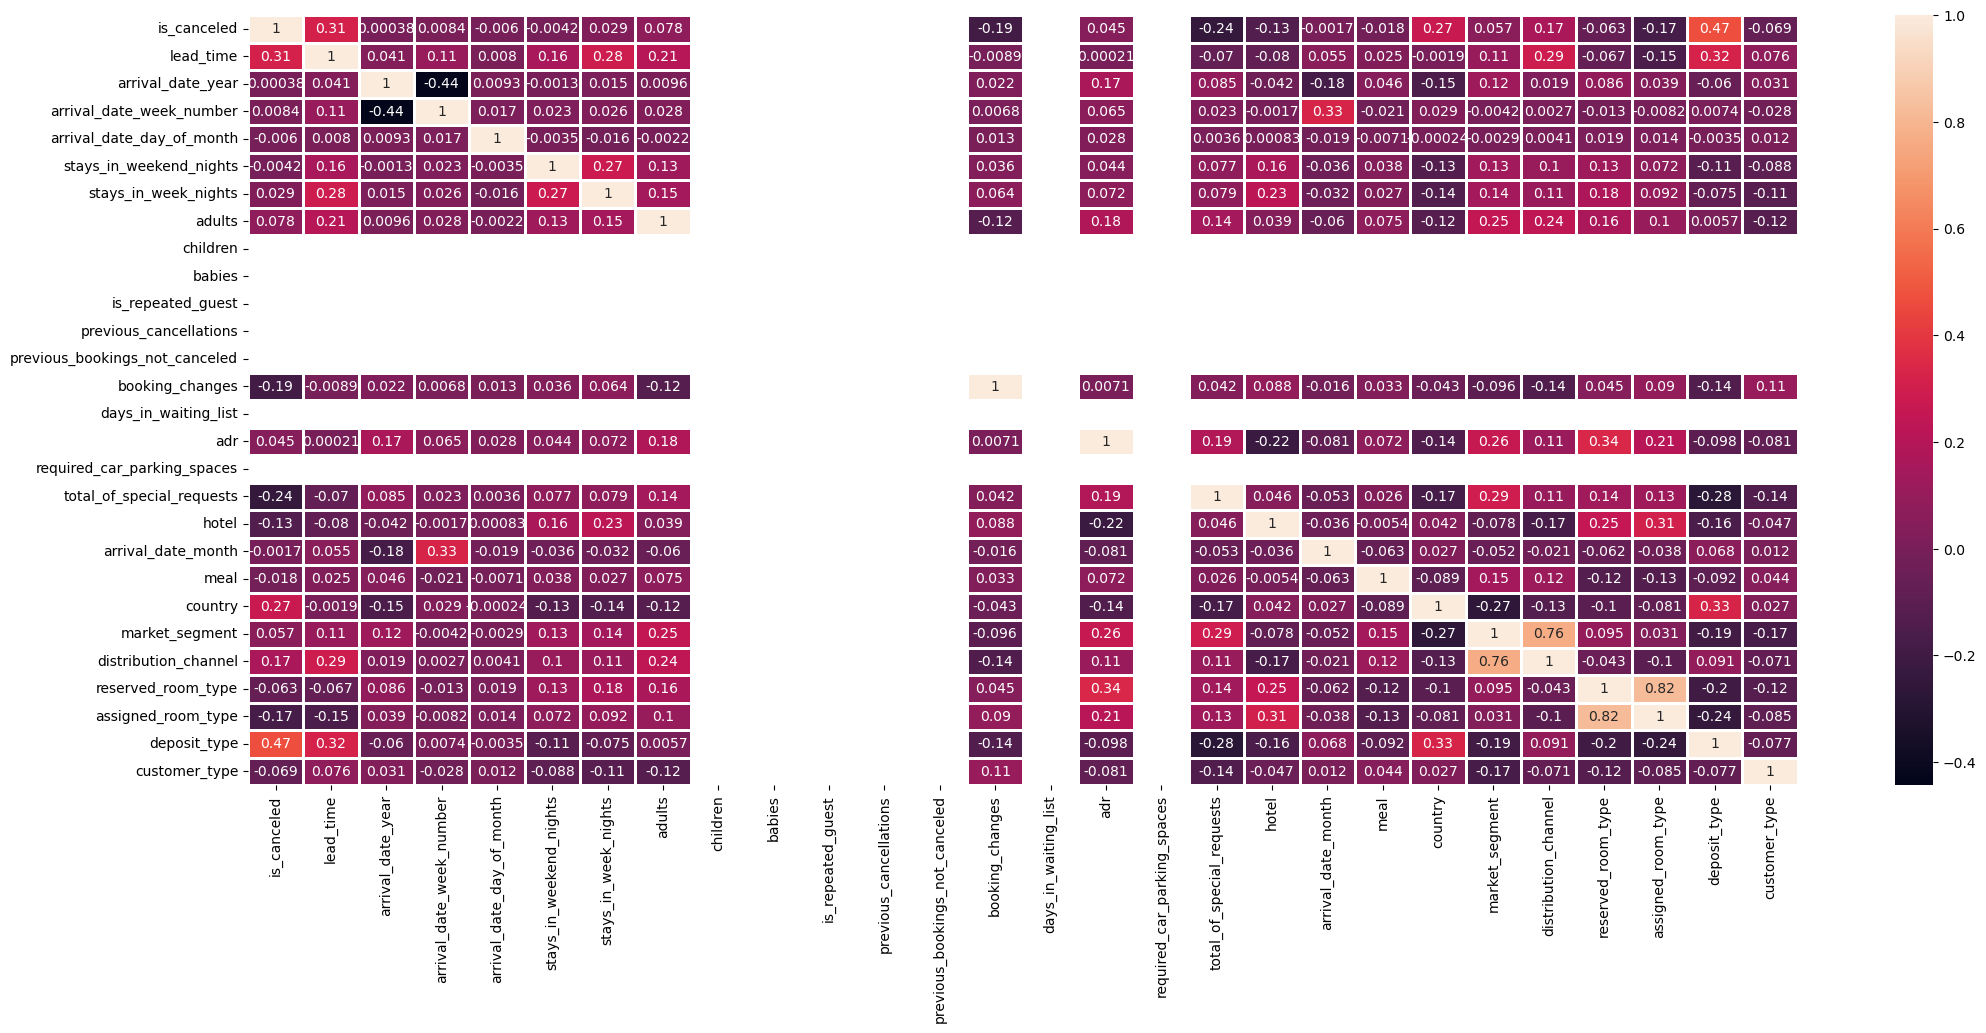

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (25, 10))

corr = transformed_df.corr(method = 'pearson')
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [42]:
correlation = transformed_df.corr()['is_canceled'].abs().sort_values(ascending = False)
print(correlation)

# Select the top 10 features with the highest correlation with the target column 'is_canceled' 
top_10_features = correlation[0:15]

df_classify = transformed_df[top_10_features.index]
df_classify

is_canceled                       1.000000
deposit_type                      0.468430
lead_time                         0.312698
country                           0.270894
total_of_special_requests         0.243884
booking_changes                   0.186603
assigned_room_type                0.174910
distribution_channel              0.165411
hotel                             0.134556
adults                            0.077827
customer_type                     0.068804
reserved_room_type                0.062586
market_segment                    0.056759
adr                               0.045292
stays_in_week_nights              0.028769
meal                              0.017972
arrival_date_week_number          0.008440
arrival_date_day_of_month         0.006019
stays_in_weekend_nights           0.004235
arrival_date_month                0.001664
arrival_date_year                 0.000378
children                               NaN
babies                                 NaN
is_repeated

,is_canceled,deposit_type,lead_time,country,total_of_special_requests,booking_changes,assigned_room_type,distribution_channel,hotel,adults,customer_type,reserved_room_type,market_segment,adr,stays_in_week_nights
0,0.0,0.0,9.0,135.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0
1,0.0,0.0,9.0,135.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0
2,0.0,0.0,1.0,59.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,3.0,3.0,1.0
3,0.0,0.0,2.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,1.0
4,0.0,0.0,2.0,59.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,6.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118727,0.0,0.0,2.0,15.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,0.0,5.0,5.0,5.0
118728,0.0,0.0,6.0,56.0,2.0,0.0,4.0,3.0,0.0,2.0,2.0,4.0,6.0,9.0,5.0
118729,0.0,0.0,3.0,43.0,2.0,0.0,3.0,3.0,0.0,2.0,2.0,3.0,6.0,8.0,5.0
118730,0.0,0.0,6.0,59.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,0.0,6.0,5.0,5.0


In [45]:
# # Split the data df_classify into two data frames: one for the training data and one for the test data and shuffle them then save them to CSV files
# from sklearn.model_selection import train_test_split

# X = df_classify.drop(['is_canceled'], axis=1)
# y = df_classify['is_canceled']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# # Merge the training data and the target column
# df_train = pd.concat([X_train, y_train], axis=1)

# # Merge the test data and the target column
# df_test = pd.concat([X_test, y_test], axis=1)

# # Save the training data to a CSV file
# df_train.to_csv('hotel_bookings_train.csv', index=False)

# # Save the test data to a CSV file
# df_test.to_csv('hotel_bookings_test.csv', index=False)

In [494]:
x_data = df_classify.drop(['is_canceled'], axis=1)

x_data.shape

(118732, 14)

In [495]:
# Select the 'is_canceled' column as y_data
y_data = df_classify['is_canceled']
y_data.shape

(118732,)

In [496]:
# import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [497]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7759717016886344
Confusion Matrix : 
[[13217  1605]
 [ 3715  5210]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83     14822
         1.0       0.76      0.58      0.66      8925

    accuracy                           0.78     23747
   macro avg       0.77      0.74      0.75     23747
weighted avg       0.77      0.78      0.77     23747



C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [498]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
conf = confusion_matrix(y_test, y_pred_nb)
clf_report = classification_report(y_test, y_pred_nb)

print(f"Accuracy Score of Naive Bayes is : {acc_nb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Naive Bayes is : 0.7648545079378448
Confusion Matrix : 
[[14015   807]
 [ 4777  4148]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.83     14822
         1.0       0.84      0.46      0.60      8925

    accuracy                           0.76     23747
   macro avg       0.79      0.71      0.72     23747
weighted avg       0.78      0.76      0.75     23747



In [499]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.8371162673179771
Confusion Matrix : 
[[13363  1459]
 [ 2409  6516]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87     14822
         1.0       0.82      0.73      0.77      8925

    accuracy                           0.84     23747
   macro avg       0.83      0.82      0.82     23747
weighted avg       0.84      0.84      0.84     23747



In [500]:

cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.5
0:	learn: 0.5240699	total: 4.91ms	remaining: 486ms
1:	learn: 0.4591955	total: 9.25ms	remaining: 453ms
2:	learn: 0.4292167	total: 13.4ms	remaining: 433ms
3:	learn: 0.4131306	total: 17.4ms	remaining: 417ms
4:	learn: 0.3982905	total: 21.4ms	remaining: 406ms
5:	learn: 0.3905717	total: 25.3ms	remaining: 397ms
6:	learn: 0.3849709	total: 29.4ms	remaining: 390ms
7:	learn: 0.3812018	total: 32.9ms	remaining: 378ms
8:	learn: 0.3773788	total: 37ms	remaining: 374ms
9:	learn: 0.3738247	total: 40.8ms	remaining: 367ms
10:	learn: 0.3722128	total: 44.6ms	remaining: 361ms
11:	learn: 0.3684918	total: 48.7ms	remaining: 357ms
12:	learn: 0.3663456	total: 52.9ms	remaining: 354ms
13:	learn: 0.3639483	total: 57.1ms	remaining: 350ms
14:	learn: 0.3630441	total: 60.7ms	remaining: 344ms
15:	learn: 0.3617611	total: 64.8ms	remaining: 340ms
16:	learn: 0.3600726	total: 68.1ms	remaining: 332ms
17:	learn: 0.3593110	total: 72.2ms	remaining: 329ms
18:	learn: 0.3584952	total: 75.8ms	remaining: 323ms

In [501]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8473491388385901
Confusion Matrix : 
[[13408  1414]
 [ 2211  6714]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     14822
         1.0       0.83      0.75      0.79      8925

    accuracy                           0.85     23747
   macro avg       0.84      0.83      0.83     23747
weighted avg       0.85      0.85      0.85     23747



In [504]:
vot_clf = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('xgb', xgb), ('cat', cat), ('rd_clf', rd_clf)], voting='hard')
vot_clf.fit(X_train, y_train)

y_pred_vot_clf = vot_clf.predict(X_test)

acc_vot_clf = accuracy_score(y_test, y_pred_vot_clf)
conf = confusion_matrix(y_test, y_pred_vot_clf)
clf_report = classification_report(y_test, y_pred_vot_clf)

print(f"Accuracy Score of Voting Classifier is : {acc_vot_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Learning rate set to 0.5
0:	learn: 0.5240699	total: 4.85ms	remaining: 480ms
1:	learn: 0.4591955	total: 9.4ms	remaining: 461ms
2:	learn: 0.4292167	total: 14ms	remaining: 454ms
3:	learn: 0.4131306	total: 18.8ms	remaining: 450ms
4:	learn: 0.3982905	total: 23.4ms	remaining: 445ms
5:	learn: 0.3905717	total: 27.7ms	remaining: 434ms
6:	learn: 0.3849709	total: 32.1ms	remaining: 426ms
7:	learn: 0.3812018	total: 35.6ms	remaining: 409ms
8:	learn: 0.3773788	total: 40.1ms	remaining: 405ms
9:	learn: 0.3738247	total: 44.5ms	remaining: 400ms
10:	learn: 0.3722128	total: 48.1ms	remaining: 390ms
11:	learn: 0.3684918	total: 52.6ms	remaining: 386ms
12:	learn: 0.3663456	total: 57.2ms	remaining: 383ms
13:	learn: 0.3639483	total: 61.3ms	remaining: 377ms
14:	learn: 0.3630441	total: 65.6ms	remaining: 372ms
15:	learn: 0.3617611	total: 69.6ms	remaining: 366ms
16:	learn: 0.3600726	total: 73.6ms	remaining: 359ms
17:	learn: 0.3593110	total: 77.5ms	remaining: 353ms
18:	learn: 0.3584952	total: 81.3ms	remaining: 346ms


In [506]:
from sklearn.ensemble import StackingClassifier

estimators = [('lr', lr), ('nb', nb), ('xgb', xgb), ('cat', cat), ('rd_clf', rd_clf)]
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train, y_train)

y_pred_stack_clf = stack_clf.predict(X_test)

acc_stack_clf = accuracy_score(y_test, y_pred_stack_clf)
conf = confusion_matrix(y_test, y_pred_stack_clf)
clf_report = classification_report(y_test, y_pred_stack_clf)

print(f"Accuracy Score of Stacking Classifier is : {acc_stack_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Learning rate set to 0.5
0:	learn: 0.5240699	total: 4.74ms	remaining: 469ms
1:	learn: 0.4591955	total: 8.83ms	remaining: 433ms
2:	learn: 0.4292167	total: 13.1ms	remaining: 423ms
3:	learn: 0.4131306	total: 16.9ms	remaining: 405ms
4:	learn: 0.3982905	total: 21.3ms	remaining: 404ms
5:	learn: 0.3905717	total: 25.2ms	remaining: 395ms
6:	learn: 0.3849709	total: 29.2ms	remaining: 388ms
7:	learn: 0.3812018	total: 33ms	remaining: 380ms
8:	learn: 0.3773788	total: 36.8ms	remaining: 372ms
9:	learn: 0.3738247	total: 41ms	remaining: 369ms
10:	learn: 0.3722128	total: 44.7ms	remaining: 362ms
11:	learn: 0.3684918	total: 48.7ms	remaining: 357ms
12:	learn: 0.3663456	total: 52.7ms	remaining: 352ms
13:	learn: 0.3639483	total: 56.2ms	remaining: 345ms
14:	learn: 0.3630441	total: 59.9ms	remaining: 340ms
15:	learn: 0.3617611	total: 63.6ms	remaining: 334ms
16:	learn: 0.3600726	total: 67.6ms	remaining: 330ms
17:	learn: 0.3593110	total: 71.7ms	remaining: 327ms
18:	learn: 0.3584952	total: 75.3ms	remaining: 321ms
1

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\U

Learning rate set to 0.5
0:	learn: 0.5237726	total: 4.33ms	remaining: 428ms
1:	learn: 0.4582385	total: 7.8ms	remaining: 382ms
2:	learn: 0.4285344	total: 12ms	remaining: 387ms
3:	learn: 0.4123668	total: 15.6ms	remaining: 373ms
4:	learn: 0.3973674	total: 19.5ms	remaining: 371ms
5:	learn: 0.3897720	total: 23.4ms	remaining: 366ms
6:	learn: 0.3846484	total: 26.9ms	remaining: 357ms
7:	learn: 0.3793547	total: 30.9ms	remaining: 356ms
8:	learn: 0.3759959	total: 34.4ms	remaining: 348ms
9:	learn: 0.3735047	total: 38.7ms	remaining: 348ms
10:	learn: 0.3709309	total: 42ms	remaining: 340ms
11:	learn: 0.3692894	total: 45.6ms	remaining: 334ms
12:	learn: 0.3662401	total: 49.2ms	remaining: 329ms
13:	learn: 0.3650383	total: 52.8ms	remaining: 324ms
14:	learn: 0.3637743	total: 56.3ms	remaining: 319ms
15:	learn: 0.3627881	total: 59.9ms	remaining: 314ms
16:	learn: 0.3611072	total: 63.6ms	remaining: 310ms
17:	learn: 0.3595049	total: 66.9ms	remaining: 305ms
18:	learn: 0.3588209	total: 70.3ms	remaining: 300ms
19

In [507]:
# Make a model comparison
import plotly.express as px
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Naive Bayes', 'XGBoost', 'CatBoost', 'Random Forest', 'Voting Classifier', 'Stacking Classifier'],
                        'Score': [acc_lr, acc_nb, acc_xgb, acc_cat, acc_rd_clf, acc_vot_clf, acc_stack_clf]})

models = models.sort_values(by = 'Score', ascending = False)

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

## Feature Selection using SFS (QDA)

In [450]:
# Perform feature selection using Sequential Feature Selector on QDA
qda = QuadraticDiscriminantAnalysis()
sfs = SequentialFeatureSelector(rd_clf, direction='forward', n_features_to_select=7)     # add a new feature as long as 0.01 or more improvement
sfs.fit(X_train, y_train)
x_train_s = sfs.transform(X_train)
sfs.get_feature_names_out()

array(['deposit_type', 'lead_time', 'country',
       'total_of_special_requests', 'booking_changes',
       'distribution_channel', 'adults'], dtype=object)

In [451]:
# Evaluate the accuracy with and without feature selection
qda.fit(X_train, y_train)
print(f"Score without feature selection: {qda.score(X_test, y_test)}")
qda.fit(x_train_s, y_train)
print(f"Score with feature selection: {qda.score(sfs.transform(X_test), y_test)}")

Score without feature selection: 0.7862466837916369
Score with feature selection: 0.7653177243441277


## Feature Selection using SFS (SVM)

In [441]:
# # Perform feature selection using Sequential Feature Selector on SVM
# svm = SVC()
# sfs = SequentialFeatureSelector(svm, direction='forward', tol=0.01)     # add a new feature as long as 0.01 or more improvement
# sfs.fit(x_data, y_data)
# x_data_s = sfs.transform(x_data)
# sfs.get_feature_names_out()

## Feature Selection using Chi-Square

In [442]:
# Create a function to calculate the chi-square test
# def chi_square_test(df, col1, col2):
#     contingency_table = pd.crosstab(df[col1], df[col2])
#     chi2, p, dof, expected = chi2_contingency(contingency_table)
#     return p

# # Perform the chi-square test for each categorical column with the target column 'is_canceled'
# p_values = {}
# for col in df_cat.columns:
#     p = chi_square_test(df, col, 'is_canceled')
#     p_values[col] = p

# # Reject the null hypothesis if the p-value is less than 0.05
# significant_features = [k for k, v in p_values.items() if v < 0.05]
# significant_features
